Optimal w0: 1.0189129484363915, Optimal w1: 2.952988488705917


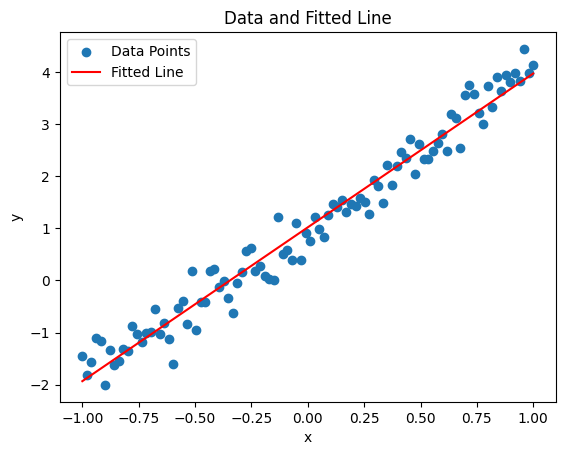

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import minimize

# Generate dataset
np.random.seed(0)  # For reproducibility
x = np.linspace(-1, 1, 100)  # 100 evenly spaced values from -1 to 1
epsilon = np.random.normal(0, np.sqrt(0.1), 100)  # Noise
y = 3*x + 1 + epsilon

# Define the error function
def error_function(w):
    w0, w1 = w
    return 0.5 * np.sum(((y - (x * w1 + w0)) / np.sqrt(0.1)) ** 2)

# Initial guess
w_initial = [0, 0]

# Minimize the error function
res = minimize(error_function, w_initial)

# Results
w0_opt, w1_opt = res.x
print(f"Optimal w0: {w0_opt}, Optimal w1: {w1_opt}")

# Plotting the error as a function of the number of updates is not directly possible
# without an iterative optimization process that records error at each step.
# Since we're using a direct optimization method (minimize), we don't have iterative updates.
# However, we can still plot the data and the fitted line.

plt.scatter(x, y, label='Data Points')
plt.plot(x, w1_opt * x + w0_opt, color='red', label='Fitted Line')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.title('Data and Fitted Line')
plt.show()


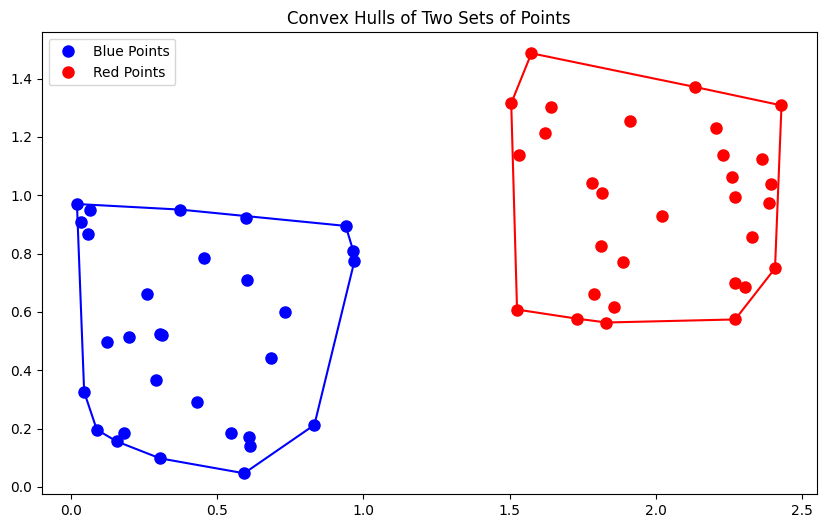

In [2]:
import matplotlib.pyplot as plt
from scipy.spatial import ConvexHull
import numpy as np

# Generating random points for two sets
np.random.seed(42)  # For reproducibility
blue_points = np.random.rand(30, 2)  # 30 random points for blue set
red_points = np.random.rand(30, 2) + np.array([1.5, 0.5])  # 30 random points for red set, offset to the right

# Compute the convex hulls for each set of points
blue_hull = ConvexHull(blue_points)
red_hull = ConvexHull(red_points)

# Plotting
plt.figure(figsize=(10, 6))

# Plot blue points and its convex hull
plt.plot(blue_points[:, 0], blue_points[:, 1], 'o', markersize=8, color='blue', label='Blue Points')
for simplex in blue_hull.simplices:
    plt.plot(blue_points[simplex, 0], blue_points[simplex, 1], 'b-')  # Hull edges

# Plot red points and its convex hull
plt.plot(red_points[:, 0], red_points[:, 1], 'o', markersize=8, color='red', label='Red Points')
for simplex in red_hull.simplices:
    plt.plot(red_points[simplex, 0], red_points[simplex, 1], 'r-')  # Hull edges

plt.title('Convex Hulls of Two Sets of Points')
plt.legend()
plt.show()


In [3]:
from sympy import symbols, diff, solve

# Define symbols
w0, w1, x, y, sigma = symbols('w0 w1 x y sigma')

# Define the error function E
E = 1/2 * ((y - x*w1 - w0)/sigma)**2

# Take partial derivatives
dE_dw0 = diff(E, w0)
dE_dw1 = diff(E, w1)

# Solve the equations dE_dw0 = 0 and dE_dw1 = 0 for w0 and w1
# Note: To actually solve the system, we need the sums over all n. We're setting up the equations here
# to illustrate the process. Actual numerical solution would require data.

dE_dw0, dE_dw1


(0.5*(2*w0 + 2*w1*x - 2*y)/sigma**2, -1.0*x*(-w0 - w1*x + y)/sigma**2)

/usr/local/lib/python3.10/dist-packages/numpy/core/fromnumeric.py:88: RuntimeWarning: overflow encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)
<ipython-input-4-37c67ed5f1b7>:21: RuntimeWarning: overflow encountered in square
  return 0.5 * np.sum(((y_n - (x_n*w1 + w0))/sigma)**2)
<ipython-input-4-37c67ed5f1b7>:30: RuntimeWarning: overflow encountered in scalar divide
  grad_w0 = np.sum((w0 + w1*x_n - y_n)) / (sigma**2)
/usr/local/lib/python3.10/dist-packages/numpy/core/fromnumeric.py:88: RuntimeWarning: invalid value encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)
<ipython-input-4-37c67ed5f1b7>:34: RuntimeWarning: invalid value encountered in scalar subtract
  w0 -= learning_rate * grad_w0


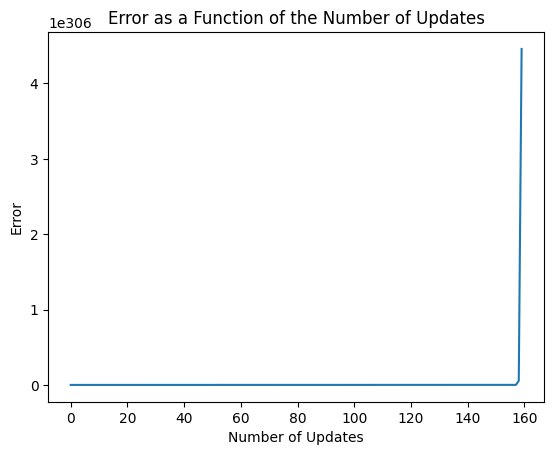

(nan, nan)

In [4]:
import numpy as np
import matplotlib.pyplot as plt

# Constants
np.random.seed(0)  # For reproducibility
N = 100  # Number of elements
sigma = np.sqrt(0.1)  # Standard deviation

# Generating dataset
x_n = np.random.uniform(-1, 1, N)  # Uniformly distributed x values between -1 and 1
epsilon_n = np.random.normal(0, sigma, N)  # Noise epsilon
y_n = 3*x_n + 1 + epsilon_n  # y values according to the given formula

# Initializing parameters
w0 = 0  # Initial guess for w0
w1 = 0  # Initial guess for w1
learning_rate = 0.01  # Learning rate for updates

# Error function
def compute_error(w0, w1, x_n, y_n, sigma):
    return 0.5 * np.sum(((y_n - (x_n*w1 + w0))/sigma)**2)

# Gradient descent to update w0 and w1
error_history = []  # To track error over updates
for update in range(1000):  # Number of updates
    error = compute_error(w0, w1, x_n, y_n, sigma)
    error_history.append(error)

    # Gradients
    grad_w0 = np.sum((w0 + w1*x_n - y_n)) / (sigma**2)
    grad_w1 = np.sum(x_n * (w0 + w1*x_n - y_n)) / (sigma**2)

    # Update rules
    w0 -= learning_rate * grad_w0
    w1 -= learning_rate * grad_w1

# Plotting the error as a function of the number of updates
plt.plot(error_history)
plt.xlabel('Number of Updates')
plt.ylabel('Error')
plt.title('Error as a Function of the Number of Updates')
plt.show()

w0, w1


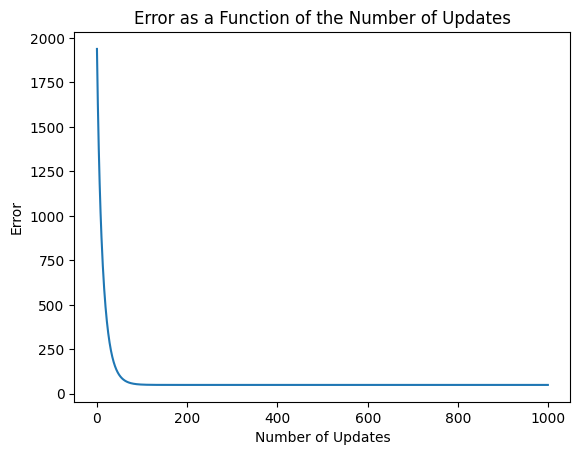

(1.0602788902914029, 2.990028551352027)

In [5]:
import numpy as np
import matplotlib.pyplot as plt

# Constants
np.random.seed(0)  # For reproducibility
N = 100  # Number of elements
sigma = np.sqrt(0.1)  # Standard deviation

# Generating dataset
x_n = np.random.uniform(-1, 1, N)  # Uniformly distributed x values between -1 and 1
epsilon_n = np.random.normal(0, sigma, N)  # Noise epsilon
y_n = 3*x_n + 1 + epsilon_n  # y values according to the given formula

# Initializing parameters
w0 = 0  # Initial guess for w0
w1 = 0  # Initial guess for w1
learning_rate = 0.0001  # Learning rate for updates

# Error function
def compute_error(w0, w1, x_n, y_n, sigma):
    return 0.5 * np.sum(((y_n - (x_n*w1 + w0))/sigma)**2)

# Gradient descent to update w0 and w1
error_history = []  # To track error over updates
for update in range(1000):  # Number of updates
    error = compute_error(w0, w1, x_n, y_n, sigma)
    error_history.append(error)

    # Gradients
    grad_w0 = np.sum((w0 + w1*x_n - y_n)) / (sigma**2)
    grad_w1 = np.sum(x_n * (w0 + w1*x_n - y_n)) / (sigma**2)

    # Update rules
    w0 -= learning_rate * grad_w0
    w1 -= learning_rate * grad_w1

# Plotting the error as a function of the number of updates
plt.plot(error_history)
plt.xlabel('Number of Updates')
plt.ylabel('Error')
plt.title('Error as a Function of the Number of Updates')
plt.show()

w0, w1


Using GMM to model Cloud.dat

In [6]:
#class RBFNet(nn.Module):
#    def __init__(self, centers, sigma):
#        super(RBFNet, self).__init__()
#        self.centers = nn.Parameter(centers)
#        self.sigmas = nn.Parameter(sigma)
#        self.linear = nn.Linear(centers.size(0), 1)  # Assuming binary classification

#    def forward(self, x):
        # Calculate the RBF activations for each neuron
#        diff = x[:, None, :] - self.centers[None, :, :]
#        dist_sq = torch.sum(diff ** 2, axis=-1)
#        out = torch.exp(-dist_sq / (2 * self.sigmas ** 2))
        # Linear combination for the output layer#
#        out = self.linear(out)
#        return out

# Define your RBF centers and sigmas
# centers = ...
# sigma = ...
# Initialize the RBF network
# rbfnet = RBFNet(centers, sigma)
# Train the RBF network
# ...


# Using Custom Parametric Model

In [7]:
# First, let's load the data from 'cloud.dat' and inspect its contents.
import numpy as np

# Load the dataset
#data_path = 'cloud.dat'
data_path = 'https://raw.githubusercontent.com/OlajideFemi/Carbon-Footprint/main/cloud.dat'
data = np.loadtxt(data_path)

# Now let's define the conversion from Cartesian to polar coordinates.
def cartesian_to_polar(x, y):
    r = np.sqrt(x**2 + y**2)
    theta = np.arctan2(y, x)
    return r, theta

# Convert the data to polar coordinates
r, theta = cartesian_to_polar(data[:, 0], data[:, 1])

# Analyze the distribution of the radius
mean_r = np.mean(r)
std_r = np.std(r)

# For this dataset, we can assume that the angle 'theta' is uniformly distributed around the circle,
# so we don't need to estimate any parameters for 'theta'.

# Define a model for the radius
def radius_density(r, mean, std):
    return (1 / (std * np.sqrt(2 * np.pi))) * np.exp(-((r - mean)**2) / (2 * std**2))

# Estimate the probability density of the radius
radius_pdf = radius_density(r, mean_r, std_r)

# Display the mean and standard deviation of the radius
mean_r, std_r, radius_pdf[:5]  # Displaying only the first 5 values of the density for brevity



(1.267660186267401,
 0.6107883776853938,
 array([0.10226725, 0.65012728, 0.11561314, 0.43183632, 0.46924191]))

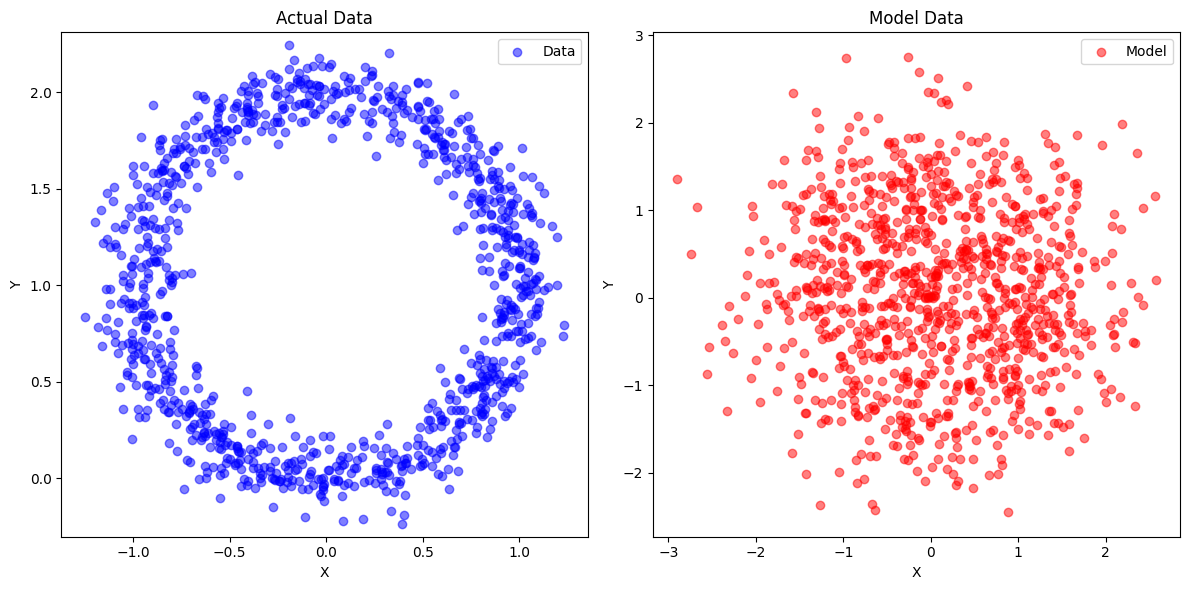

In [8]:
import matplotlib.pyplot as plt

# Plotting the actual data
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.scatter(data[:, 0], data[:, 1], color='blue', alpha=0.5, label='Data')
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Actual Data')
plt.axis('equal')
plt.legend()

# Generating model data
num_points = len(data)
theta_model = np.random.uniform(0, 2*np.pi, num_points)
r_model = np.random.normal(mean_r, std_r, num_points)
x_model = r_model * np.cos(theta_model)
y_model = r_model * np.sin(theta_model)

plt.subplot(1, 2, 2)
plt.scatter(x_model, y_model, color='red', alpha=0.5, label='Model')
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Model Data')
plt.axis('equal')
plt.legend()

plt.tight_layout()
plt.show()


# Using Radial Basis Function (RBF)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


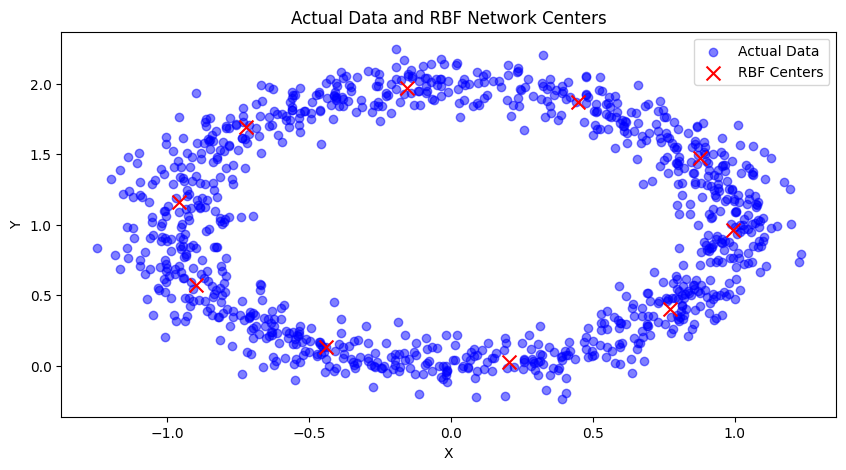

In [9]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.cluster import KMeans
from scipy.interpolate import RBFInterpolator
import numpy as np

# Load the dataset again
#data_path = 'cloud.dat'
data_path = 'https://raw.githubusercontent.com/OlajideFemi/Carbon-Footprint/main/cloud.dat'
data = np.loadtxt(data_path)

# Prepare the data
X = data[:, :2]  # Input features (x, y coordinates)
y = np.zeros((len(data),))  # Dummy variable, since we're not doing prediction but fitting

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Use KMeans to find centers for the RBFs
kmeans = KMeans(n_clusters=10, random_state=42).fit(X_train)

# Define and train RBF Network
rbf_interpolator = RBFInterpolator(kmeans.cluster_centers_, y_train[:kmeans.n_clusters], kernel='gaussian', epsilon=1)

# Generate model data (we'll use the test set for this purpose)
y_model = rbf_interpolator(X_test)

# Since y is a dummy variable, we're interested in the fitting itself, not the prediction. Thus, we visualize the centers.
centers = kmeans.cluster_centers_

# Plotting the actual data and the RBF centers
plt.figure(figsize=(10, 5))

# Actual data
plt.scatter(data[:, 0], data[:, 1], color='blue', alpha=0.5, label='Actual Data')

# RBF Centers
plt.scatter(centers[:, 0], centers[:, 1], color='red', marker='x', s=100, label='RBF Centers')

plt.xlabel('X')
plt.ylabel('Y')
plt.title('Actual Data and RBF Network Centers')
plt.legend()
plt.show()


# Using Gaussian Mixture Model

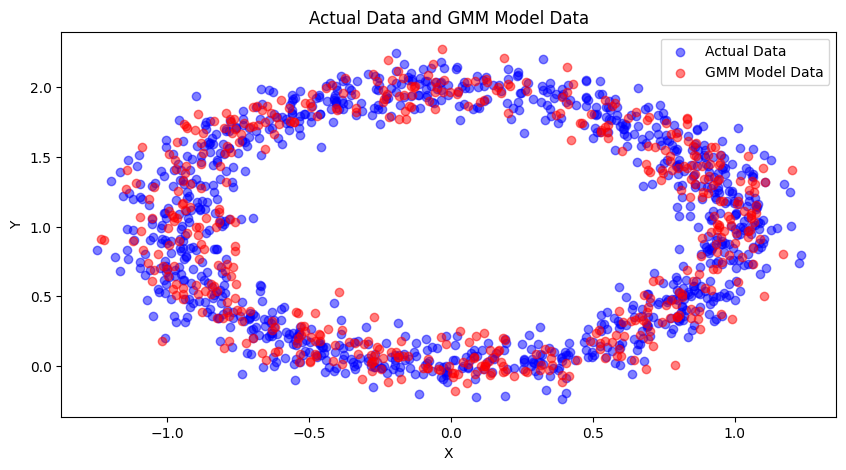

In [10]:
from sklearn.mixture import GaussianMixture

# Fit a Gaussian Mixture Model with 10 components to the data
gmm = GaussianMixture(n_components=10, random_state=42).fit(X)

# Predict the labels of the data points
labels = gmm.predict(X)

# Generate model data
# We'll sample 500 points from the GMM to serve as our model data
X_model, _ = gmm.sample(500)

# Plotting the actual data and the model data generated by the GMM
plt.figure(figsize=(10, 5))

# Actual data
plt.scatter(X[:, 0], X[:, 1], color='blue', alpha=0.5, label='Actual Data')

# Model data from GMM
plt.scatter(X_model[:, 0], X_model[:, 1], color='red', alpha=0.5, label='GMM Model Data')

plt.xlabel('X')
plt.ylabel('Y')
plt.title('Actual Data and GMM Model Data')
plt.legend()
plt.show()


# Using Circular Regression Model

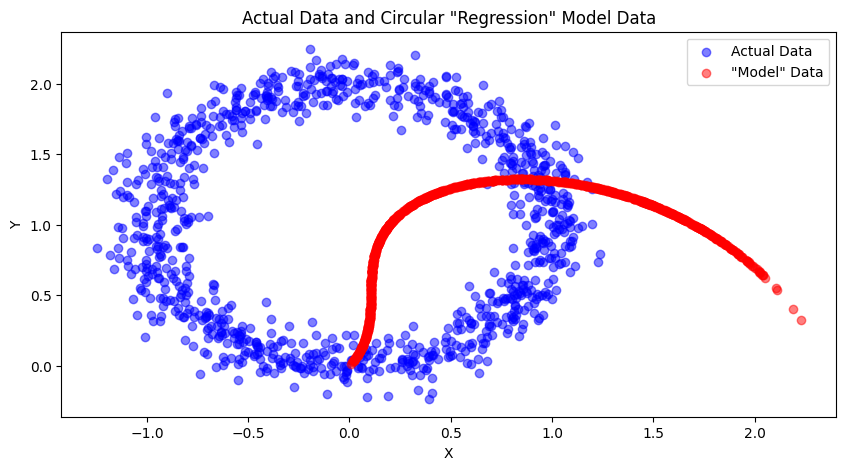

In [11]:
# Calculate polar coordinates from the Cartesian coordinates of the actual data
r_data, theta_data = cartesian_to_polar(X[:, 0], X[:, 1])

# Illustrative model: Predict theta as a function of r (for visualization purposes)
# This is a simplistic and illustrative model, not a true circular regression
theta_model = np.sin(r_data) + np.cos(r_data)

# Convert the model theta back to Cartesian coordinates for visualization
x_model = r_data * np.cos(theta_model)
y_model = r_data * np.sin(theta_model)

# Plotting the actual data and the "model" data
plt.figure(figsize=(10, 5))

# Actual data
plt.scatter(X[:, 0], X[:, 1], color='blue', alpha=0.5, label='Actual Data')

# "Model" data
plt.scatter(x_model, y_model, color='red', alpha=0.5, label='"Model" Data')

plt.xlabel('X')
plt.ylabel('Y')
plt.title('Actual Data and Circular "Regression" Model Data')
plt.legend()
plt.show()


# Using Spectral Clustering

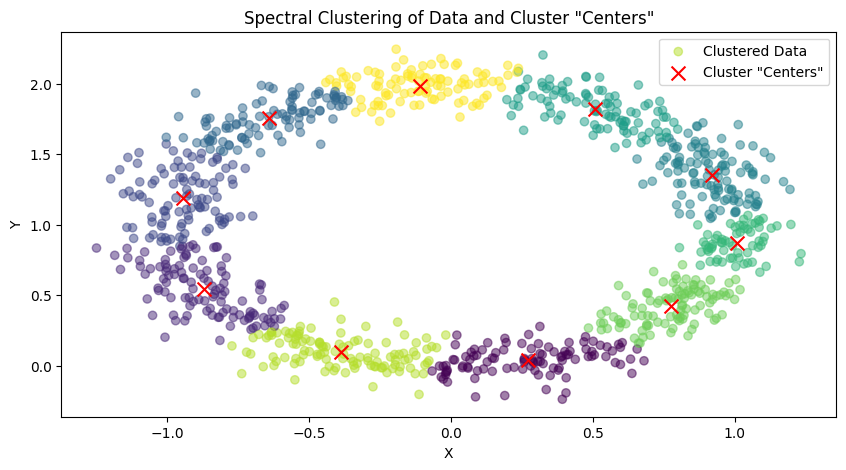

In [12]:
from sklearn.cluster import SpectralClustering

# Perform spectral clustering on the data
# We choose 10 clusters to match the previous models for consistency
spectral = SpectralClustering(n_clusters=10, affinity='nearest_neighbors', random_state=42)
labels = spectral.fit_predict(X)

# For visualization purposes, we'll use the cluster centers as a "model" of the data.
# Calculate the pseudo "centers" of the clusters
centers = np.array([X[labels == i].mean(axis=0) for i in range(10)])

# Plotting the actual data and the "centers" of the spectral clusters
plt.figure(figsize=(10, 5))

# Actual data with cluster coloring
plt.scatter(X[:, 0], X[:, 1], c=labels, cmap='viridis', alpha=0.5, label='Clustered Data')

# Cluster "centers" determined by mean position
plt.scatter(centers[:, 0], centers[:, 1], color='red', marker='x', s=100, label='Cluster "Centers"')

plt.xlabel('X')
plt.ylabel('Y')
plt.title('Spectral Clustering of Data and Cluster "Centers"')
plt.legend()
plt.show()


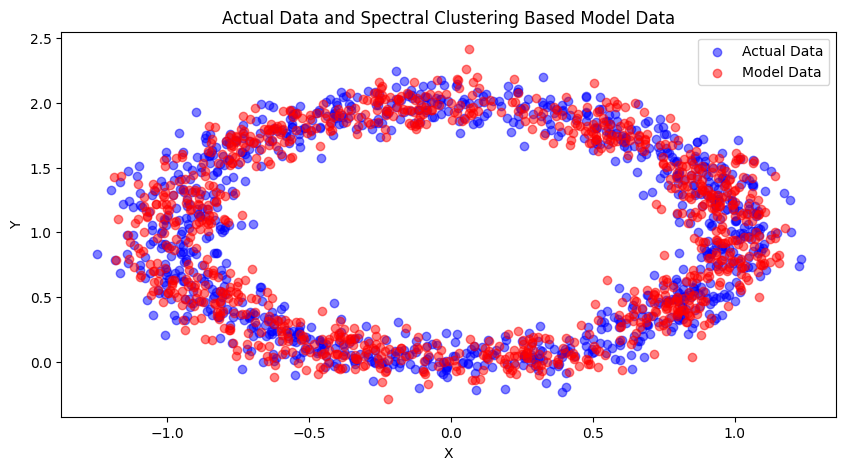

In [13]:
from sklearn.covariance import EmpiricalCovariance
import numpy as np

# Initialize a list to hold the generated model data
model_data = np.empty((0, 2))

# For each cluster, estimate a Gaussian distribution and sample new data points
for i in range(10):
    cluster_points = X[labels == i]
    if len(cluster_points) == 0:
        continue  # Skip empty clusters, if any

    # Estimate the covariance of the current cluster
    cov_estimator = EmpiricalCovariance().fit(cluster_points)
    cov_matrix = cov_estimator.covariance_

    # Generate new points from a multivariate normal distribution based on the cluster's properties
    new_points = np.random.multivariate_normal(mean=centers[i], cov=cov_matrix, size=len(cluster_points))

    # Append the new points to the model data
    model_data = np.vstack((model_data, new_points))

# Plotting the actual data and the generated model data
plt.figure(figsize=(10, 5))

# Actual data
plt.scatter(X[:, 0], X[:, 1], color='blue', alpha=0.5, label='Actual Data')

# Model data generated based on spectral clustering
plt.scatter(model_data[:, 0], model_data[:, 1], color='red', alpha=0.5, label='Model Data')

plt.xlabel('X')
plt.ylabel('Y')
plt.title('Actual Data and Spectral Clustering Based Model Data')
plt.legend()
plt.show()


# Deep Learning with a Custom Loss Function

In [14]:
pip install tensorflow


In [15]:
def custom_loss(y_true, y_pred):
    reconstruction_loss = tf.reduce_mean(tf.square(y_true - y_pred))
    regularization_term = tf.reduce_mean(tf.square(tf.norm(encoded, axis=1) - 1))
    return reconstruction_loss + 0.01 * regularization_term


In [16]:
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense
from tensorflow.keras.optimizers import Adam
import tensorflow as tf


In [17]:
input_layer = Input(shape=(2,))  # Assuming 2D input data
encoded = Dense(2, activation='relu')(input_layer)
decoded = Dense(2, activation='linear')(encoded)
autoencoder = Model(input_layer, decoded)
encoder = Model(input_layer, encoded)


In [18]:
def custom_loss(y_true, y_pred):
    reconstruction_loss = tf.reduce_mean(tf.square(y_true - y_pred))
    regularization_term = tf.reduce_mean(tf.square(tf.norm(encoded, axis=1) - 1))
    return reconstruction_loss + 0.01 * regularization_term


In [19]:
autoencoder.compile(optimizer=Adam(learning_rate=0.001), loss=custom_loss)


In [20]:
#history = autoencoder.fit(X, X, epochs=100, batch_size=32, shuffle=True, validation_split=0.2)


In [21]:
import tensorflow as tf
from tensorflow.keras.layers import Layer, Input, Dense
from tensorflow.keras.models import Model

class CustomEncodingLayer(Layer):
    def __init__(self, encoding_dim):
        super(CustomEncodingLayer, self).__init__()
        self.encoding_dim = encoding_dim
        self.dense = Dense(encoding_dim, activation='relu')

    def call(self, inputs):
        encoded = self.dense(inputs)
        # Compute regularization term directly here if needed
        return encoded

class CustomAutoencoder(Model):
    def __init__(self, encoding_dim, input_dim):
        super(CustomAutoencoder, self).__init__()
        self.encoder = CustomEncodingLayer(encoding_dim)
        self.decoder = Dense(input_dim, activation='linear')

    def call(self, inputs):
        encoded = self.encoder(inputs)
        decoded = self.decoder(encoded)
        return decoded

    def train_step(self, data):
        # Override train_step to compute and apply custom loss
        # Make sure to compute the regularization term correctly within the TensorFlow graph
        pass  # Implement training logic here


In [22]:
import numpy as np

def cart_to_polar(x, y):
    r = np.sqrt(x**2 + y**2)
    theta = np.arctan2(y, x)
    return r, theta

def polar_to_cart(r, theta):
    x = r * np.cos(theta)
    y = r * np.sin(theta)
    return x, y

# Assuming 'data' is a NumPy array with x, y coordinates
r, theta = cart_to_polar(data[:, 0], data[:, 1])

# Estimate parameters for the radius distribution
mean_r = np.mean(r)
std_r = np.std(r)

# For theta, if it is uniformly distributed, we do not need to estimate any parameters

# Define the likelihood function
def likelihood(r, theta, mean_r, std_r):
    prob_r = np.exp(-(r - mean_r)**2 / (2 * std_r**2)) / (std_r * np.sqrt(2 * np.pi))
    prob_theta = 1 / (2 * np.pi)  # For uniform distribution
    return prob_r * prob_theta

# Parameter estimation could be performed here using an optimization method if necessary

# Predicting new data points
def predict(num_samples, mean_r, std_r):
    r = np.random.normal(mean_r, std_r, num_samples)
    theta = np.random.uniform(0, 2*np.pi, num_samples)
    x, y = polar_to_cart(r, theta)
    return x, y

# Generate new data points
num_samples = 100
predicted_x, predicted_y = predict(num_samples, mean_r, std_r)



# Using Support Vector Machine (SVM) with RBF Kernel to Model the Data

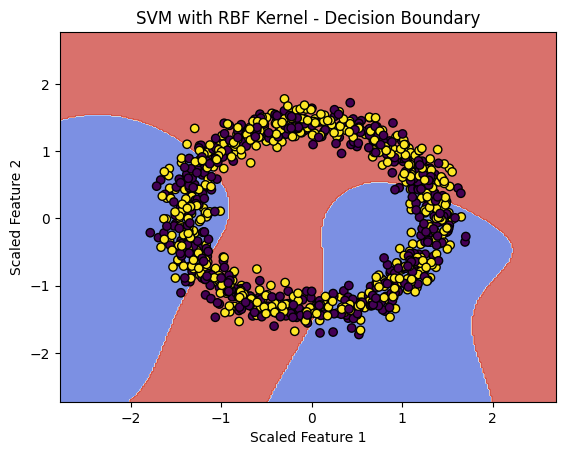

In [23]:
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import make_moons
import numpy as np

# Assuming we're working with the same X data loaded previously

# Step 1: Preprocessing - Standardize the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Step 2: For demonstration, let's use the make_moons function to generate a binary classification dataset
# This is purely for demonstration; replace this with your actual labels if you have a labeled dataset
_, y_demo = make_moons(n_samples=len(X), noise=0.1, random_state=42)

# Step 3: Model Training - Train an SVM model with an RBF kernel
svm_model = SVC(kernel='rbf', C=1, gamma='auto')
svm_model.fit(X_scaled, y_demo)

# Step 4: Visualization - We'll visualize the decision boundary along with the data
# Create a mesh to plot the decision boundaries
x_min, x_max = X_scaled[:, 0].min() - 1, X_scaled[:, 0].max() + 1
y_min, y_max = X_scaled[:, 1].min() - 1, X_scaled[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.02),
                     np.arange(y_min, y_max, 0.02))

# Predict on the mesh grid to find the decision boundaries
Z = svm_model.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# Plotting
plt.contourf(xx, yy, Z, alpha=0.75, cmap='coolwarm')
plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=y_demo, edgecolors='k')
plt.title('SVM with RBF Kernel - Decision Boundary')
plt.xlabel('Scaled Feature 1')
plt.ylabel('Scaled Feature 2')
plt.show()


# Using Physicsbased or Geometrical Modeling

Optimized Circle Parameters: Center = (-0.0015044686589748386, 1.0000880225762774), Radius = 1.0047406185674392


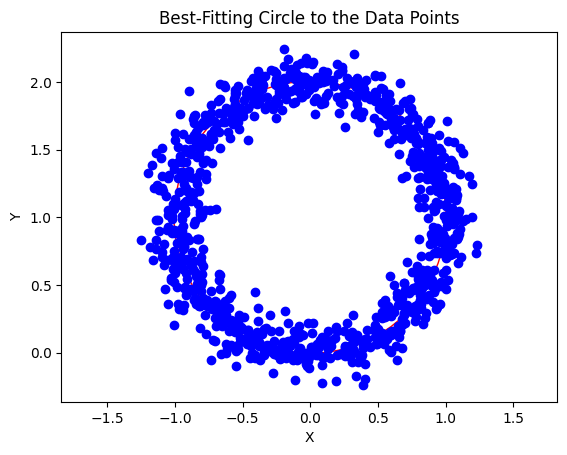

In [24]:
from scipy import optimize

# Define the objective function for the best-fitting circle
def objective_function(circle, x):
    x_c, y_c, r = circle
    return ((x[:, 0] - x_c)**2 + (x[:, 1] - y_c)**2 - r**2)**2

# Initial guess for the circle's center and radius
initial_guess = [0.0, 0.0, 1.0]

# Perform the optimization to find the best-fitting circle
result = optimize.minimize(
    lambda circle: sum(objective_function(circle, X)),
    initial_guess,
    method='L-BFGS-B',  # Bounded optimization method suitable for this problem
    bounds=[(-np.inf, np.inf), (-np.inf, np.inf), (0, np.inf)]  # Radius must be non-negative
)

if result.success:
    fitted_circle = result.x
    print(f"Optimized Circle Parameters: Center = ({fitted_circle[0]}, {fitted_circle[1]}), Radius = {fitted_circle[2]}")
else:
    print("Optimization was not successful. Please check the data or initial guess.")

# Visualization of the fitted circle and the data points
circle = plt.Circle((fitted_circle[0], fitted_circle[1]), fitted_circle[2], color='r', fill=False)

fig, ax = plt.subplots()
ax.add_artist(circle)
ax.scatter(X[:, 0], X[:, 1], color='blue')
ax.set_aspect('equal', adjustable='datalim')
plt.title('Best-Fitting Circle to the Data Points')
plt.xlabel('X')
plt.ylabel('Y')
plt.show()


# DBSCAN

Number of clusters found: 1
Number of points classified as noise: 0


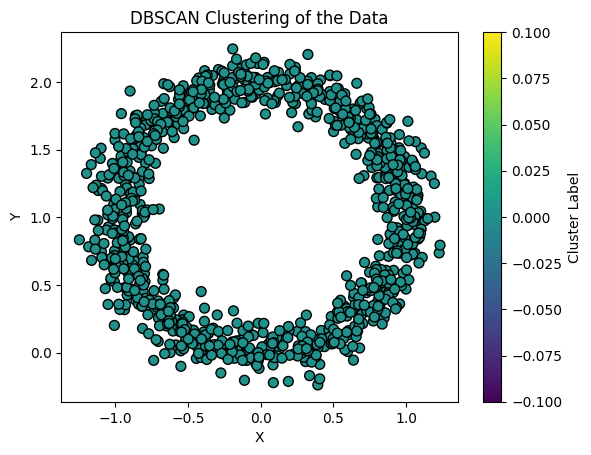

In [25]:
from sklearn.cluster import DBSCAN

# Apply DBSCAN to the dataset
dbscan = DBSCAN(eps=0.5, min_samples=5)
dbscan_labels = dbscan.fit_predict(X)

# Number of clusters found (excluding noise if present)
n_clusters = len(set(dbscan_labels)) - (1 if -1 in dbscan_labels else 0)
n_noise = list(dbscan_labels).count(-1)

print(f"Number of clusters found: {n_clusters}")
print(f"Number of points classified as noise: {n_noise}")

# Visualization of the clustering
plt.scatter(X[:, 0], X[:, 1], c=dbscan_labels, cmap='viridis', marker='o', edgecolor='k', s=50)
plt.title('DBSCAN Clustering of the Data')
plt.xlabel('X')
plt.ylabel('Y')
plt.colorbar(label='Cluster Label')
plt.show()


In [26]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import Rbf


np.random.seed(0)  # For reproducibility
sigma_sq = 0.01  # Define the variance of the Gaussian noise
X = np.random.uniform(0, 1, 100)
Y = 0.5 + 0.4 * np.sin(2 * np.pi * X) + np.random.normal(0, np.sqrt(sigma_sq), 100)

# Generate dataset
#np.random.seed(0)  # For reproducibility
#X = np.random.uniform(0, 1, 100)
#Y = 0.5 + 0.4 * np.sin(2 * np.pi * X) + np.random.normal(0, np.sqrt(sigma_sq), 100)

# Sort X and compute centers for RBF
X_sorted = np.sort(X)
centers = np.array([np.mean(X_sorted[i:i+10]) for i in range(0, 100, 10)])

# Create RBF interpolator
#rbf_interpolator = Rbf(X, Y, centers, function='gaussian')

# Generate interpolating values
#X_interp = np.linspace(0, 1, 100)
#Y_interp = rbf_interpolator(X_interp)

# Plot the dataset and interpolating function
#plt.scatter(X, Y, label='Data Points')
#plt.plot(X_interp, Y_interp, color='red', label='Interpolating Function')
#plt.xlabel('x')
#plt.ylabel('y')
#plt.legend()

#plt.show()


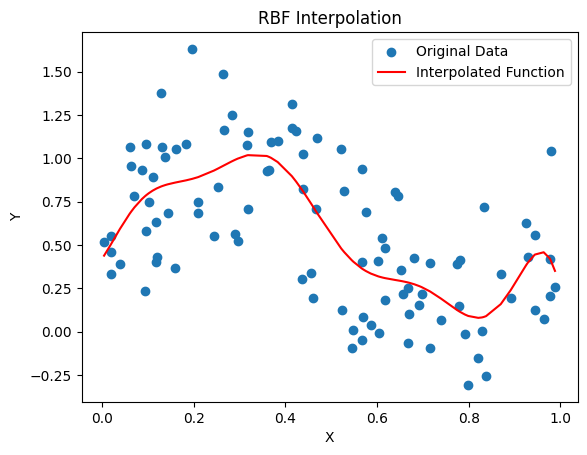

In [27]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import Rbf

np.random.seed(0)  # For reproducibility
sigma_sq = 0.1  # Define the variance of the noise
X = np.random.uniform(0, 1, 100)
Y = 0.5 + 0.4 * np.sin(2 * np.pi * X) + np.random.normal(0, np.sqrt(sigma_sq), 100)

# Sort X and find the centers
X_sorted = np.sort(X)
X_subsets = np.array_split(X_sorted, 10)
centers = np.array([np.mean(x_subset) for x_subset in X_subsets])

# Make sure the centers are broadcasted to each data point in X for interpolation#


# Assuming that 'centers' should be used to compute the values of RBF at data points
rbf_values = np.zeros((len(X), len(centers)))
for i, center in enumerate(centers):
    rbf_values[:, i] = np.exp(-((X - center) ** 2) / (2 * sigma_sq))

# Compute the weights for the RBF network
weights = np.linalg.lstsq(rbf_values, Y, rcond=None)[0]

# Generate interpolating values
Y_interpolated = rbf_values @ weights

# Plotting the original data and the interpolating function
plt.scatter(X, Y, label='Original Data')
plt.plot(X_sorted, Y_interpolated[np.argsort(X)], label='Interpolated Function', color='red')
plt.legend()
plt.xlabel('X')
plt.ylabel('Y')
plt.title('RBF Interpolation')
plt.show()


In [28]:
import numpy as np

def tanh(x):
    return np.tanh(x)

def tanh_derivative(x):
    return 1.0 - np.tanh(x)**2

def linear(x):
    return x

def linear_derivative(x):
    return 1

class TwoLayerNetwork:
    def __init__(self, input_size, hidden_size, output_size):
        self.w1 = np.random.randn(input_size, hidden_size)
        self.b1 = np.random.randn(hidden_size)
        self.w2 = np.random.randn(hidden_size, output_size)
        self.b2 = np.random.randn(output_size)

    def forward(self, x):
        self.z1 = np.dot(x, self.w1) + self.b1
        self.a1 = tanh(self.z1)
        self.z2 = np.dot(self.a1, self.w2) + self.b2
        self.a2 = linear(self.z2)
        return self.a2

    def compute_loss(self, predicted, target):
        return np.mean((predicted - target) ** 2)


In [29]:
    def backward(self, x, y):
        m = y.shape[0]  # Number of examples
        dz2 = (self.a2 - y) / m
        dw2 = np.dot(self.a1.T, dz2)
        db2 = np.sum(dz2, axis=0)

        dz1 = np.dot(dz2, self.w2.T) * tanh_derivative(self.z1)
        dw1 = np.dot(x.T, dz1)
        db1 = np.sum(dz1, axis=0)

        return dw1, db1, dw2, db2


In [30]:
def approximate_derivative(network, x, y, epsilon=1e-4):
    approx_derivatives = []
    # Approximate derivatives for weights and biases in layer 1
    for i in range(network.w1.size):
        w1_plus_eps = network.w1.copy()
        w1_plus_eps.flat[i] += epsilon
        loss_plus = network.compute_loss(network.forward(x), y)

        w1_minus_eps = network.w1.copy()
        w1_minus_eps.flat[i] -= epsilon
        loss_minus = network.compute_loss(network.forward(x), y)

        approx_derivative = (loss_plus - loss_minus) / (2 * epsilon)
        approx_derivatives.append(approx_derivative)

    # Similarly, add code for w2, b1, and b2 by following the same structure

    return approx_derivatives


In [31]:
import numpy as np

class TwoLayerNetwork:
    def __init__(self, input_size, hidden_size, output_size):
        # Initialize weights and biases
        self.w1 = np.random.randn(input_size, hidden_size)
        self.b1 = np.zeros(hidden_size)
        self.w2 = np.random.randn(hidden_size, output_size)
        self.b2 = np.zeros(output_size)

    def forward(self, X):
        # Forward propagation
        self.z1 = np.dot(X, self.w1) + self.b1
        self.a1 = np.tanh(self.z1)
        self.z2 = np.dot(self.a1, self.w2) + self.b2
        return self.z2

    def backward(self, X, y):
        # Backward propagation
        error = self.forward(X) - y
        delta2 = error
        dw2 = np.dot(self.a1.T, delta2)
        db2 = np.sum(delta2, axis=0)
        delta1 = np.dot(delta2, self.w2.T) * (1 - np.tanh(self.z1) ** 2)
        dw1 = np.dot(X.T, delta1)
        db1 = np.sum(delta1, axis=0)

        return dw1, db1, dw2, db2

    def loss(self, y_pred, y_true):
        # Mean squared error loss
        return np.mean((y_pred - y_true) ** 2)

# Generate a dataset
np.random.seed(0)
X = np.random.randn(100, 2)  # 100 samples, 2 features
y = np.random.randn(100, 1)  # 100 target values

# Initialize network
input_size = X.shape[1]
hidden_size = 5  # Number of hidden units
output_size = y.shape[1]
network = TwoLayerNetwork(input_size, hidden_size, output_size)

# Forward pass to compute initial loss
y_pred = network.forward(X)
initial_loss = network.loss(y_pred, y)

# Backward pass to compute gradients
dw1, db1, dw2, db2 = network.backward(X, y)

# Numerical gradient check
epsilon = 1e-5
network.w1 += epsilon
loss_plus_epsilon = network.loss(network.forward(X), y)
network.w1 -= 2 * epsilon
loss_minus_epsilon = network.loss(network.forward(X), y)
numerical_gradient_w1 = (loss_plus_epsilon - loss_minus_epsilon) / (2 * epsilon)
print("Analytical Gradient:", np.linalg.norm(dw1))
print("Numerical Gradient:", np.linalg.norm(numerical_gradient_w1))

# Reset the weight after the check
network.w1 += epsilon

# Implement training loop, optimizer, etc., as needed.


Analytical Gradient: 70.00823583984142
Numerical Gradient: 1.6261183769517016


In [32]:
import numpy as np

class TwoLayerNetwork:
    def __init__(self, input_size, hidden_size, output_size):
        self.w1 = np.random.randn(input_size, hidden_size)
        self.b1 = np.zeros(hidden_size)
        self.w2 = np.random.randn(hidden_size, output_size)
        self.b2 = np.zeros(output_size)

    def forward(self, X):
        self.z1 = np.dot(X, self.w1) + self.b1
        self.a1 = np.tanh(self.z1)
        self.z2 = np.dot(self.a1, self.w2) + self.b2
        return self.z2

    def backward(self, X, y):
        # Forward pass
        y_pred = self.forward(X)
        # Backward pass
        grad_y_pred = 2.0 * (y_pred - y)
        grad_w2 = np.dot(self.a1.T, grad_y_pred)
        grad_b2 = np.sum(grad_y_pred, axis=0)

        grad_a1 = np.dot(grad_y_pred, self.w2.T)
        grad_z1 = grad_a1 * (1 - self.a1 ** 2)
        grad_w1 = np.dot(X.T, grad_z1)
        grad_b1 = np.sum(grad_z1, axis=0)

        return grad_w1, grad_b1, grad_w2, grad_b2


In [33]:
np.random.seed(0)
X = np.random.randn(100, 3)  # 100 samples, 3 features
y = np.random.randn(100, 1)  # 100 target values


In [34]:
input_size = 3
hidden_size = 5
output_size = 1
network = TwoLayerNetwork(input_size, hidden_size, output_size)

# Compute back-propagation derivatives
dw1, db1, dw2, db2 = network.backward(X, y)

def compute_numerical_gradient(N, X, y, epsilon=1e-5):
    initial_w1 = np.copy(N.w1)
    grad_approx = np.zeros_like(N.w1)

    # Compute numerical gradient for w1
    for i in range(N.w1.shape[0]):
        for j in range(N.w1.shape[1]):
            N.w1 = np.copy(initial_w1)
            N.w1[i, j] += epsilon
            y_pred_plus = N.forward(X)

            N.w1 = np.copy(initial_w1)
            N.w1[i, j] -= epsilon
            y_pred_minus = N.forward(X)

            grad_approx[i, j] = (np.sum((y_pred_plus - y) ** 2) - np.sum((y_pred_minus - y) ** 2)) / (2 * epsilon)

    N.w1 = initial_w1  # Reset to original weights
    return grad_approx

# Compute numerical gradient
numerical_grad_w1 = compute_numerical_gradient(network, X, y)

# Compare gradients
print("Analytical Gradient:", np.linalg.norm(dw1))
print("Numerical Gradient:", np.linalg.norm(numerical_grad_w1))


Analytical Gradient: 210.8370317502748
Numerical Gradient: 210.83703175516436


In [35]:
import numpy as np

class TwoLayerNetwork:
    def __init__(self, input_size, hidden_size, output_size):
        self.w1 = np.random.randn(input_size, hidden_size)
        self.b1 = np.zeros(hidden_size)
        self.w2 = np.random.randn(hidden_size, output_size)
        self.b2 = np.zeros(output_size)

    def forward(self, X):
        self.z1 = np.dot(X, self.w1) + self.b1
        self.a1 = np.tanh(self.z1)
        self.z2 = np.dot(self.a1, self.w2) + self.b2
        return self.z2

    def backward(self, X, y):
        # (Implement backward pass here)
        pass

    def compute_loss(self, y_pred, y_true):
        # Mean squared error
        return np.mean((y_pred - y_true) ** 2)

# (Continue with the rest of your implementation)


In [36]:
# Initialize the network with the proper dimensions
network = TwoLayerNetwork(input_size=3, hidden_size=5, output_size=1)

# Generate synthetic data for testing
np.random.seed(42)
X_test = np.random.randn(10, 3)
y_test = np.random.randn(10, 1)

# Forward pass to get predictions
predictions = network.forward(X_test)

# Compute loss between predictions and actual values
loss = network.compute_loss(predictions, y_test)
print(f"Loss: {loss}")

# Add the backward pass and numerical gradient checking as needed


Loss: 1.5996389644583038


In [37]:
#class TwoLayerNetwork:
 #   def __init__(self, input_size, hidden_size, output_size):
        # Initialization code as before

  #  def forward(self, X):
        # Forward pass code as before

   # def backward(self, X, y):
        # Backward pass code as before

    #def compute_loss(self, y_pred, y_true):
        # Mean Squared Error Loss
     #   return np.mean((y_pred - y_true) ** 2)


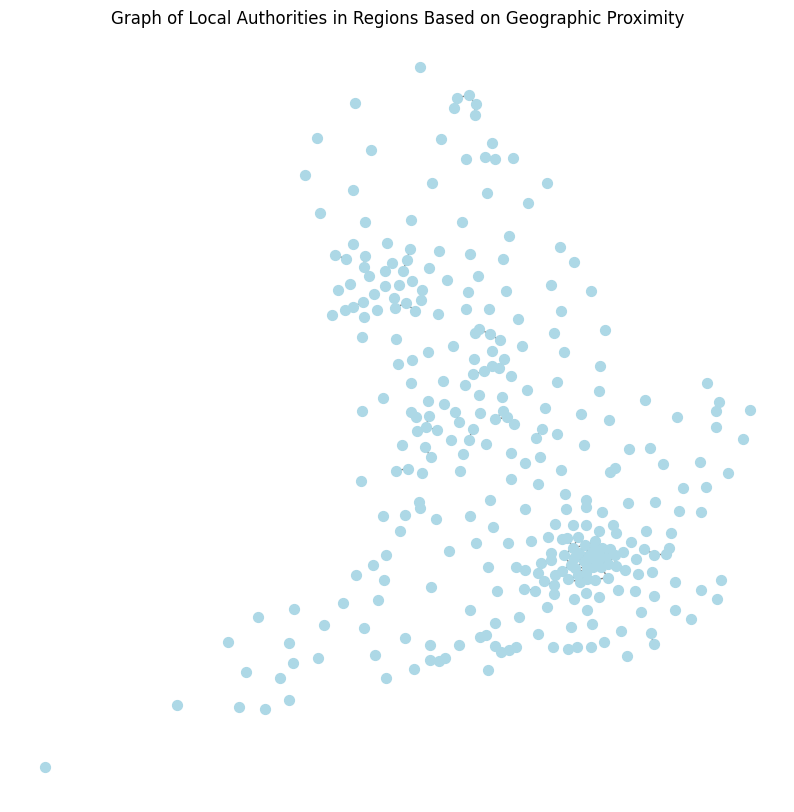

In [38]:
import pandas as pd
import geopandas as gpd
from shapely import wkt
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt

import pandas as pd

# Load the datasets
topo_lad_df = pd.read_csv('https://raw.githubusercontent.com/OlajideFemi/OlajideFemi.github.io/index/topo_lad_1.csv')
all_regions_data_ = pd.read_csv('https://raw.githubusercontent.com/OlajideFemi/OlajideFemi.github.io/index/all_regions_data_.csv')

# Merge on the 'Local Authority' column to align the datasets
filtered_gdf_ = all_regions_data_.merge(topo_lad_df, left_on='Local Authority', right_on='LAD13NM')

import geopandas as gpd
from shapely import wkt

# Convert 'geometry' column from WKT to shapely geometries
topo_lad_df['geometry'] = topo_lad_df['geometry'].apply(wkt.loads)

# Convert the pandas DataFrame to a GeoDataFrame
gdf = gpd.GeoDataFrame(topo_lad_df, geometry='geometry')

# Calculate centroids
gdf['centroid'] = gdf['geometry'].centroid

# Extract latitude and longitude from the centroids
gdf['latitude'] = gdf['centroid'].y
gdf['longitude'] = gdf['centroid'].x

import numpy as np

def haversine(lat1, lon1, lat2, lon2):
    # Radius of the Earth in kilometers
    R = 6371.0
    # Convert coordinates from degrees to radians
    lat1, lon1, lat2, lon2 = map(np.radians, [lat1, lon1, lat2, lon2])
    # Compute differences in coordinates
    dlat = lat2 - lat1
    dlon = lon2 - lon1
    # Haversine formula
    a = np.sin(dlat/2.0)**2 + np.cos(lat1) * np.cos(lat2) * np.sin(dlon/2.0)**2
    c = 2 * np.arcsin(np.sqrt(a))
    distance = R * c
    return distance

def find_neighbors(gdf, threshold=10):  # Threshold in kilometers
    edges = []
    for index, row in gdf.iterrows():
        lat1, lon1 = row['latitude'], row['longitude']
        for j, candidate_row in gdf.iterrows():
            if index == j:
                continue  # Skip self
            lat2, lon2 = candidate_row['latitude'], candidate_row['longitude']
            distance = haversine(lat1, lon1, lat2, lon2)
            if distance <= threshold:
                edges.append((index, j))
    return edges


edges = find_neighbors(gdf, threshold=10)

import networkx as nx

# Initialize an empty graph
G = nx.Graph()

G.add_edges_from(edges)

for index, row in gdf.iterrows():
    G.add_node(index, label=row['LAD13NM'])

import matplotlib.pyplot as plt

# Define positions based on geographic coordinates
pos = {index: (row['longitude'], row['latitude']) for index, row in gdf.iterrows()}

# Draw the graph
fig, ax = plt.subplots(figsize=(10, 10))
#nx.draw(G, pos, with_labels=False, node_size=50, node_color='lightblue', edge_color='gray', width=1)
nx.draw(G, pos, ax=ax, with_labels=False, node_size=50, node_color='lightblue', edge_color='gray', width=1)
plt.title('Graph of Local Authorities in Regions Based on Geographic Proximity')
plt.show()







In [39]:
all_regions_data_ = pd.read_csv('https://raw.githubusercontent.com/OlajideFemi/OlajideFemi.github.io/index/all_regions_data_.csv')
all_regions_data_.to_csv('data_all.csv')

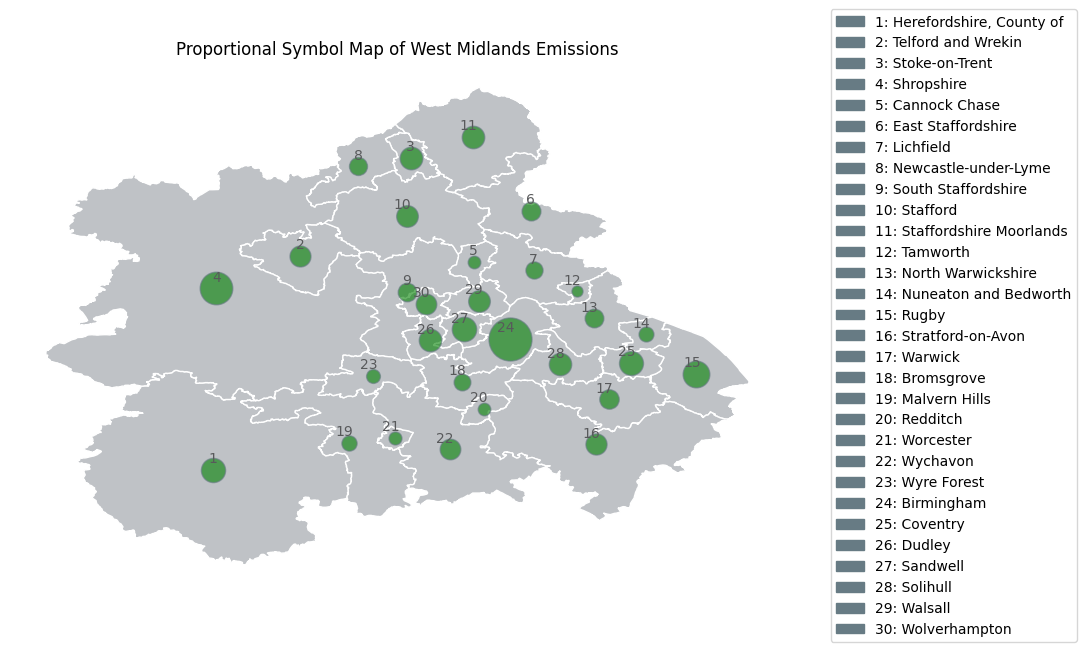

In [40]:
import geopandas as gpd
import pandas as pd
import matplotlib.pyplot as plt

topo_lad_csv_path = 'https://raw.githubusercontent.com/OlajideFemi/OlajideFemi.github.io/index/topo_lad_1.csv'
topo_lad_df = pd.read_csv(topo_lad_csv_path)

topo_lad_gdf = gpd.GeoDataFrame(topo_lad_df, geometry=gpd.GeoSeries.from_wkt(topo_lad_df['geometry']))

areas_to_visualize = {
    "Local Authority": [
        "Birmingham", "Bromsgrove", "Cannock Chase", "Coventry", "Dudley",
        "East Staffordshire", "Herefordshire, County of", "Lichfield", "Malvern Hills",
        "Newcastle-under-Lyme", "North Warwickshire", "Nuneaton and Bedworth", "Redditch",
        "Rugby", "Sandwell", "Shropshire", "Solihull", "South Staffordshire",
        "Stafford", "Staffordshire Moorlands", "Stoke-on-Trent", "Stratford-on-Avon",
        "Tamworth", "Telford and Wrekin", "Walsall", "Warwick", "Wolverhampton",
        "Worcester", "Wychavon", "Wyre Forest"
    ],
    "Emissions": [
        96194.42, 14592.43, 8323.91, 29913.27, 26291.81,
        18530.12, 30369.14, 15314.26, 12044.33,
        16825.96, 18244.97, 11604.42, 8275.61,
        37092.39, 31099.31, 55209.7, 26119.39, 17940.00,
        24410.05, 26321.27, 26681.51, 23179.05,
        6411.41, 22889.89, 24428.08, 19614.43, 22070.84,
        8733.09, 22128.51, 9923.38
    ]
}

West_Midlands_emissions_df = pd.DataFrame(areas_to_visualize)

filtered_gdf = topo_lad_gdf[topo_lad_gdf['LAD13NM'].isin(areas_to_visualize["Local Authority"])]
filtered_gdf = filtered_gdf.merge(West_Midlands_emissions_df, left_on='LAD13NM', right_on='Local Authority')

filtered_gdf['ID'] = range(1, len(filtered_gdf) + 1)

fig, ax = plt.subplots(figsize=(10, 10))
filtered_gdf.plot(ax=ax, color='#BFC2C6', edgecolor='white')

filtered_gdf['centroid'] = filtered_gdf.geometry.centroid

for idx, row in filtered_gdf.iterrows():
    ax.scatter(row['centroid'].x, row['centroid'].y, s=row['Emissions'] / 100, edgecolor='#677B84', color='green', alpha=0.6)

if 'ID' in filtered_gdf.columns:
    for idx, row in filtered_gdf.iterrows():
        plt.annotate(text=row['ID'], xy=(row['centroid'].x, row['centroid'].y),
                     xytext=(3, 3), textcoords="offset points", color='#58595B',
                     horizontalalignment='right', verticalalignment='bottom')

from matplotlib.patches import Patch
legend_labels = [Patch(label=f'{row["ID"]}: {row["LAD13NM"]}', color = '#677B84') for idx, row in filtered_gdf.iterrows()]

plt.legend(handles=legend_labels, bbox_to_anchor=(1.05, 0.5), loc='center left')

ax.set_title('Proportional Symbol Map of West Midlands Emissions')
ax.set_xlabel('Longitude')
ax.set_ylabel('Latitude')

ax.axis('off')
plt.show()


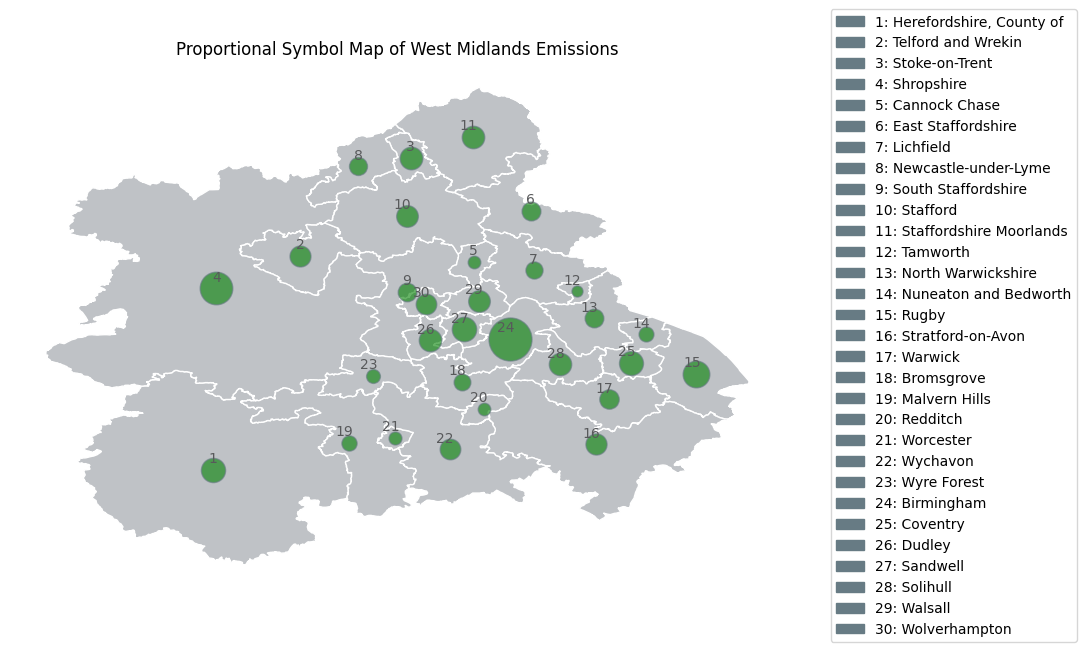

In [41]:
import geopandas as gpd
import pandas as pd
import matplotlib.pyplot as plt

topo_lad_csv_path = 'https://raw.githubusercontent.com/OlajideFemi/OlajideFemi.github.io/index/topo_lad_1.csv'
topo_lad_df = pd.read_csv(topo_lad_csv_path)

topo_lad_gdf = gpd.GeoDataFrame(topo_lad_df, geometry=gpd.GeoSeries.from_wkt(topo_lad_df['geometry']))

areas_to_visualize = {
    "Local Authority": [
        "Birmingham", "Bromsgrove", "Cannock Chase", "Coventry", "Dudley",
        "East Staffordshire", "Herefordshire, County of", "Lichfield", "Malvern Hills",
        "Newcastle-under-Lyme", "North Warwickshire", "Nuneaton and Bedworth", "Redditch",
        "Rugby", "Sandwell", "Shropshire", "Solihull", "South Staffordshire",
        "Stafford", "Staffordshire Moorlands", "Stoke-on-Trent", "Stratford-on-Avon",
        "Tamworth", "Telford and Wrekin", "Walsall", "Warwick", "Wolverhampton",
        "Worcester", "Wychavon", "Wyre Forest"
    ],
    "Emissions": [
        96194.42, 14592.43, 8323.91, 29913.27, 26291.81,
        18530.12, 30369.14, 15314.26, 12044.33,
        16825.96, 18244.97, 11604.42, 8275.61,
        37092.39, 31099.31, 55209.7, 26119.39, 17940.00,
        24410.05, 26321.27, 26681.51, 23179.05,
        6411.41, 22889.89, 24428.08, 19614.43, 22070.84,
        8733.09, 22128.51, 9923.38
    ]
}

West_Midlands_emissions_df = pd.DataFrame(areas_to_visualize)

filtered_gdf = topo_lad_gdf[topo_lad_gdf['LAD13NM'].isin(areas_to_visualize["Local Authority"])]
filtered_gdf = filtered_gdf.merge(West_Midlands_emissions_df, left_on='LAD13NM', right_on='Local Authority')

filtered_gdf['ID'] = range(1, len(filtered_gdf) + 1)

fig, ax = plt.subplots(figsize=(10, 10))
filtered_gdf.plot(ax=ax, color='#BFC2C6', edgecolor='white')

filtered_gdf['centroid'] = filtered_gdf.geometry.centroid

for idx, row in filtered_gdf.iterrows():
    ax.scatter(row['centroid'].x, row['centroid'].y, s=row['Emissions'] / 100, edgecolor='#677B84', color='green', alpha=0.6)

if 'ID' in filtered_gdf.columns:
    for idx, row in filtered_gdf.iterrows():
        plt.annotate(text=row['ID'], xy=(row['centroid'].x, row['centroid'].y),
                     xytext=(3, 3), textcoords="offset points", color='#58595B',
                     horizontalalignment='right', verticalalignment='bottom')

from matplotlib.patches import Patch
legend_labels = [Patch(label=f'{row["ID"]}: {row["LAD13NM"]}', color = '#677B84') for idx, row in filtered_gdf.iterrows()]

plt.legend(handles=legend_labels, bbox_to_anchor=(1.05, 0.5), loc='center left')

ax.set_title('Proportional Symbol Map of West Midlands Emissions')
ax.set_xlabel('Longitude')
ax.set_ylabel('Latitude')

ax.axis('off')
plt.show()


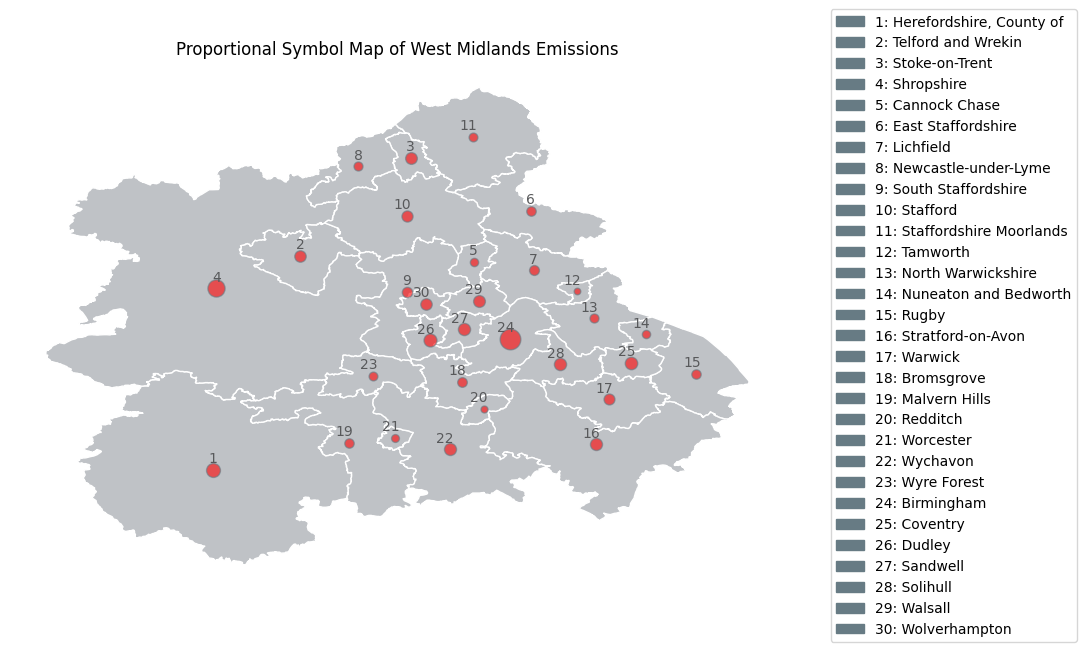

In [42]:
# comaparing value of emissions in 2008 and 2021 within the West Midlands
import geopandas as gpd
import pandas as pd
import matplotlib.pyplot as plt

topo_lad_csv_path = 'https://raw.githubusercontent.com/OlajideFemi/OlajideFemi.github.io/index/topo_lad_1.csv'
topo_lad_df = pd.read_csv(topo_lad_csv_path)

topo_lad_gdf = gpd.GeoDataFrame(topo_lad_df, geometry=gpd.GeoSeries.from_wkt(topo_lad_df['geometry']))

areas_to_visualize = {
    "Local Authority": [
        "Birmingham", "Bromsgrove", "Cannock Chase", "Coventry", "Dudley",
        "East Staffordshire", "Herefordshire, County of", "Lichfield", "Malvern Hills",
        "Newcastle-under-Lyme", "North Warwickshire", "Nuneaton and Bedworth", "Redditch",
        "Rugby", "Sandwell", "Shropshire", "Solihull", "South Staffordshire",
        "Stafford", "Staffordshire Moorlands", "Stoke-on-Trent", "Stratford-on-Avon",
        "Tamworth", "Telford and Wrekin", "Walsall", "Warwick", "Wolverhampton",
        "Worcester", "Wychavon", "Wyre Forest"
    ],
    "Emissions": [
        22.24302938, 4.833818788, 3.573942347, 8.082658044, 8.716090557,
        4.65914505, 10.03008724, 5.058948897, 4.592740429,
        4.205247479, 4.246878523, 3.589356627, 2.550547152,
        4.562981508, 7.726843804, 15.29768205, 7.742818656, 5.539861496,
        6.425263586, 4.022515094, 7.089696852, 7.535507473,
        2.259172515, 6.762043361, 7.251229458, 6.182550494, 6.799014853,
        3.242063331, 7.54829273, 4.023811033
    ]
}

West_Midlands_emissions_df = pd.DataFrame(areas_to_visualize)

filtered_gdf = topo_lad_gdf[topo_lad_gdf['LAD13NM'].isin(areas_to_visualize["Local Authority"])]
filtered_gdf = filtered_gdf.merge(West_Midlands_emissions_df, left_on='LAD13NM', right_on='Local Authority')

filtered_gdf['ID'] = range(1, len(filtered_gdf) + 1)

fig, ax = plt.subplots(figsize=(10, 10))
filtered_gdf.plot(ax=ax, color='#BFC2C6', edgecolor='white')

filtered_gdf['centroid'] = filtered_gdf.geometry.centroid

for idx, row in filtered_gdf.iterrows():
    ax.scatter(row['centroid'].x, row['centroid'].y, s=row['Emissions'] * 10, edgecolor='#677B84', color='red', alpha=0.6)

if 'ID' in filtered_gdf.columns:
    for idx, row in filtered_gdf.iterrows():
        plt.annotate(text=row['ID'], xy=(row['centroid'].x, row['centroid'].y),
                     xytext=(3, 3), textcoords="offset points", color='#58595B',
                     horizontalalignment='right', verticalalignment='bottom')

from matplotlib.patches import Patch
legend_labels = [Patch(label=f'{row["ID"]}: {row["LAD13NM"]}', color = '#677B84') for idx, row in filtered_gdf.iterrows()]

plt.legend(handles=legend_labels, bbox_to_anchor=(1.05, 0.5), loc='center left')

ax.set_title('Proportional Symbol Map of West Midlands Emissions')
ax.set_xlabel('Longitude')
ax.set_ylabel('Latitude')

ax.axis('off')
plt.show()



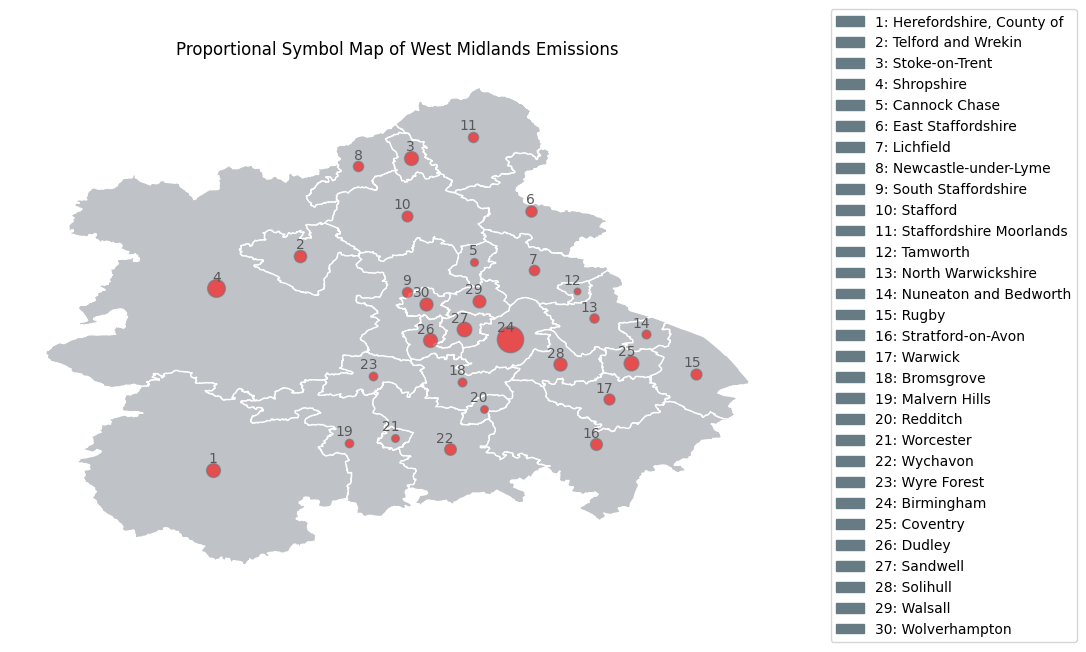

In [43]:
import geopandas as gpd
import pandas as pd
import matplotlib.pyplot as plt

topo_lad_csv_path = 'https://raw.githubusercontent.com/OlajideFemi/OlajideFemi.github.io/index/topo_lad_1.csv'
topo_lad_df = pd.read_csv(topo_lad_csv_path)

topo_lad_gdf = gpd.GeoDataFrame(topo_lad_df, geometry=gpd.GeoSeries.from_wkt(topo_lad_df['geometry']))

areas_to_visualize = {
    "Local Authority": [
        "Birmingham", "Bromsgrove", "Cannock Chase", "Coventry", "Dudley",
        "East Staffordshire", "Herefordshire, County of", "Lichfield", "Malvern Hills",
        "Newcastle-under-Lyme", "North Warwickshire", "Nuneaton and Bedworth", "Redditch",
        "Rugby", "Sandwell", "Shropshire", "Solihull", "South Staffordshire",
        "Stafford", "Staffordshire Moorlands", "Stoke-on-Trent", "Stratford-on-Avon",
        "Tamworth", "Telford and Wrekin", "Walsall", "Warwick", "Wolverhampton",
        "Worcester", "Wychavon", "Wyre Forest"
    ],
    "Emissions": [
        3622.665412, 401.3101363, 324.6981635, 1146.05309, 1010.346795,
        668.6848677, 1015.355413, 572.979797, 378.715238,
        550.6792211, 449.5586866, 413.9270139, 305.6812122,
        633.5693252, 1131.018151, 1646.632143, 909.0808695, 543.422038,
        616.1575224, 545.2636347, 1018.656851, 735.2235472,
        234.1949014, 801.7373521, 866.2604975, 634.5603213, 888.8938004,
        318.6142856, 717.256562, 382.6030346
    ]
}

West_Midlands_emissions_df = pd.DataFrame(areas_to_visualize)

filtered_gdf = topo_lad_gdf[topo_lad_gdf['LAD13NM'].isin(areas_to_visualize["Local Authority"])]
filtered_gdf = filtered_gdf.merge(West_Midlands_emissions_df, left_on='LAD13NM', right_on='Local Authority')

filtered_gdf['ID'] = range(1, len(filtered_gdf) + 1)

fig, ax = plt.subplots(figsize=(10, 10))
filtered_gdf.plot(ax=ax, color='#BFC2C6', edgecolor='white')

filtered_gdf['centroid'] = filtered_gdf.geometry.centroid

for idx, row in filtered_gdf.iterrows():
    ax.scatter(row['centroid'].x, row['centroid'].y, s=row['Emissions'] / 10, edgecolor='#677B84', color='red', alpha=0.6)

if 'ID' in filtered_gdf.columns:
    for idx, row in filtered_gdf.iterrows():
        plt.annotate(text=row['ID'], xy=(row['centroid'].x, row['centroid'].y),
                     xytext=(3, 3), textcoords="offset points", color='#58595B',
                     horizontalalignment='right', verticalalignment='bottom')

from matplotlib.patches import Patch
legend_labels = [Patch(label=f'{row["ID"]}: {row["LAD13NM"]}', color = '#677B84') for idx, row in filtered_gdf.iterrows()]

plt.legend(handles=legend_labels, bbox_to_anchor=(1.05, 0.5), loc='center left')

ax.set_title('Proportional Symbol Map of West Midlands Emissions')
ax.set_xlabel('Longitude')
ax.set_ylabel('Latitude')

ax.axis('off')
plt.show()


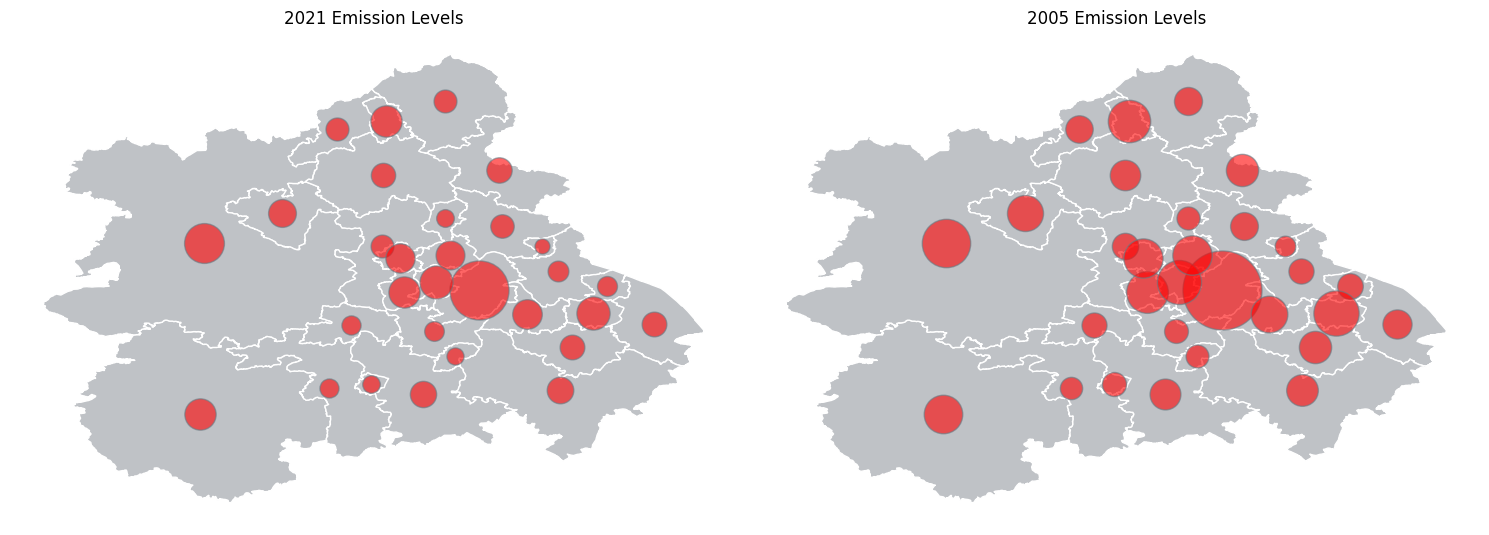

In [44]:
import geopandas as gpd
import pandas as pd
import matplotlib.pyplot as plt

# Data for the first visualization
areas_to_visualize_1 = {
    "Local Authority": [
        "Birmingham", "Bromsgrove", "Cannock Chase", "Coventry", "Dudley",
        "East Staffordshire", "Herefordshire, County of", "Lichfield", "Malvern Hills",
        "Newcastle-under-Lyme", "North Warwickshire", "Nuneaton and Bedworth", "Redditch",
        "Rugby", "Sandwell", "Shropshire", "Solihull", "South Staffordshire",
        "Stafford", "Staffordshire Moorlands", "Stoke-on-Trent", "Stratford-on-Avon",
        "Tamworth", "Telford and Wrekin", "Walsall", "Warwick", "Wolverhampton",
        "Worcester", "Wychavon", "Wyre Forest"
    ],
    "Emissions": [
        3622.665412, 401.3101363, 324.6981635, 1146.05309, 1010.346795,
        668.6848677, 1015.355413, 572.979797, 378.715238,
        550.6792211, 449.5586866, 413.9270139, 305.6812122,
        633.5693252, 1131.018151, 1646.632143, 909.0808695, 543.422038,
        616.1575224, 545.2636347, 1018.656851, 735.2235472,
        234.1949014, 801.7373521, 866.2604975, 634.5603213, 888.8938004,
        318.6142856, 717.256562, 382.6030346
    ]
}

# Data for the second visualization
areas_to_visualize_2 = {
    "Local Authority": [
        "Birmingham", "Bromsgrove", "Cannock Chase", "Coventry", "Dudley",
        "East Staffordshire", "Herefordshire, County of", "Lichfield", "Malvern Hills",
        "Newcastle-under-Lyme", "North Warwickshire", "Nuneaton and Bedworth", "Redditch",
        "Rugby", "Sandwell", "Shropshire", "Solihull", "South Staffordshire",
        "Stafford", "Staffordshire Moorlands", "Stoke-on-Trent", "Stratford-on-Avon",
        "Tamworth", "Telford and Wrekin", "Walsall", "Warwick", "Wolverhampton",
        "Worcester", "Wychavon", "Wyre Forest"
    ],
    "Emissions": [
        6479.843254, 590.7181488, 553.0509167, 2126.445049, 1804.133429,
        1078.711366, 1540.103887, 800.7480549, 517.1105821,
        781.5119445, 658.2316275, 681.6360141, 544.7472592,
        884.3129309, 2016.055588, 2429.660141, 1397.038485, 720.6282332,
        966.2980986, 815.9472484, 1867.227433, 1039.667955,
        440.4468112, 1351.832403, 1608.017111, 1082.709203, 1596.687215,
        600.7787738, 989.2882638, 651.6125408
    ]
}

# Read shapefile
topo_lad_csv_path = 'https://raw.githubusercontent.com/OlajideFemi/OlajideFemi.github.io/index/topo_lad_1.csv'
topo_lad_df = pd.read_csv(topo_lad_csv_path)
topo_lad_gdf = gpd.GeoDataFrame(topo_lad_df, geometry=gpd.GeoSeries.from_wkt(topo_lad_df['geometry']))

# Prepare the dataframes
West_Midlands_emissions_df_1 = pd.DataFrame(areas_to_visualize_1)
West_Midlands_emissions_df_2 = pd.DataFrame(areas_to_visualize_2)

# Filtered GeoDataFrame for the first visualization
filtered_gdf_1 = topo_lad_gdf[topo_lad_gdf['LAD13NM'].isin(areas_to_visualize_1["Local Authority"])]
filtered_gdf_1 = filtered_gdf_1.merge(West_Midlands_emissions_df_1, left_on='LAD13NM', right_on='Local Authority')

# Filtered GeoDataFrame for the second visualization
filtered_gdf_2 = topo_lad_gdf[topo_lad_gdf['LAD13NM'].isin(areas_to_visualize_2["Local Authority"])]
filtered_gdf_2 = filtered_gdf_2.merge(West_Midlands_emissions_df_2, left_on='LAD13NM', right_on='Local Authority')

# Create subplots
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15, 7))

# Plot for the first visualization
ax1 = axes[0]
filtered_gdf_1.plot(ax=ax1, color='#BFC2C6', edgecolor='white', legend=True)
ax1.set_title('2021 Emission Levels')
ax1.axis('off')

# Add markers for the first visualization
for idx, row in filtered_gdf_1.iterrows():
    centroid = row['geometry'].centroid
    ax1.scatter(centroid.x, centroid.y, s=row['Emissions'] / 2, edgecolor='#677B84', color='red', alpha=0.6)

# Plot for the second visualization
ax2 = axes[1]
filtered_gdf_2.plot(ax=ax2, color='#BFC2C6', edgecolor='white', legend=True)
ax2.set_title('2005 Emission Levels')
ax2.axis('off')

# Add markers for the second visualization
for idx, row in filtered_gdf_2.iterrows():
    centroid = row['geometry'].centroid
    ax2.scatter(centroid.x, centroid.y, s=row['Emissions'] / 2, edgecolor='#677B84', color='red', alpha=0.6)

# Show plot
plt.tight_layout()
plt.show()


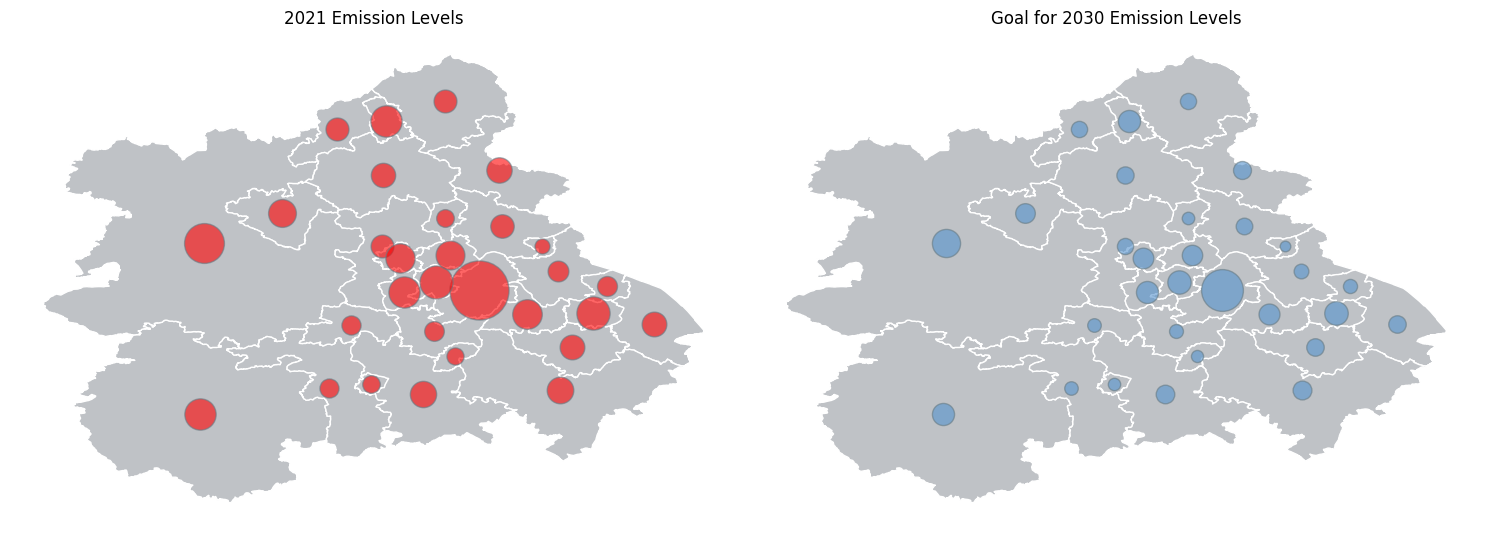

In [45]:
import geopandas as gpd
import pandas as pd
import matplotlib.pyplot as plt

# Data for the first visualization
areas_to_visualize_1 = {
    "Local Authority": [
        "Birmingham", "Bromsgrove", "Cannock Chase", "Coventry", "Dudley",
        "East Staffordshire", "Herefordshire, County of", "Lichfield", "Malvern Hills",
        "Newcastle-under-Lyme", "North Warwickshire", "Nuneaton and Bedworth", "Redditch",
        "Rugby", "Sandwell", "Shropshire", "Solihull", "South Staffordshire",
        "Stafford", "Staffordshire Moorlands", "Stoke-on-Trent", "Stratford-on-Avon",
        "Tamworth", "Telford and Wrekin", "Walsall", "Warwick", "Wolverhampton",
        "Worcester", "Wychavon", "Wyre Forest"
    ],
    "Emissions": [
        3622.665412, 401.3101363, 324.6981635, 1146.05309, 1010.346795,
        668.6848677, 1015.355413, 572.979797, 378.715238,
        550.6792211, 449.5586866, 413.9270139, 305.6812122,
        633.5693252, 1131.018151, 1646.632143, 909.0808695, 543.422038,
        616.1575224, 545.2636347, 1018.656851, 735.2235472,
        234.1949014, 801.7373521, 866.2604975, 634.5603213, 888.8938004,
        318.6142856, 717.256562, 382.6030346
    ]
}

# Data for the second visualization
areas_to_visualize_2 = {
    "Local Authority": [
        "Birmingham", "Bromsgrove", "Cannock Chase", "Coventry", "Dudley",
        "East Staffordshire", "Herefordshire, County of", "Lichfield", "Malvern Hills",
        "Newcastle-under-Lyme", "North Warwickshire", "Nuneaton and Bedworth", "Redditch",
        "Rugby", "Sandwell", "Shropshire", "Solihull", "South Staffordshire",
        "Stafford", "Staffordshire Moorlands", "Stoke-on-Trent", "Stratford-on-Avon",
        "Tamworth", "Telford and Wrekin", "Walsall", "Warwick", "Wolverhampton",
        "Worcester", "Wychavon", "Wyre Forest"
    ],
    "Emissions": [
        1811.332706, 200.6550682, 162.3490818, 573.0265451, 505.1733975,
        334.3424338, 507.6777067, 286.4898985, 189.357619,
        275.3396105, 224.7793433, 206.963507, 152.8406061,
        316.7846626, 565.5090754, 823.3160716, 454.5404348, 271.711019,
        308.0787612, 272.6318173, 509.3284256, 367.6117736,
        117.0974507, 400.8686761, 433.1302487, 317.2801606, 444.4469002,
        159.3071428, 358.628281, 191.3015173
    ]
}


# Read shapefile
topo_lad_csv_path = 'https://raw.githubusercontent.com/OlajideFemi/OlajideFemi.github.io/index/topo_lad_1.csv'
topo_lad_df = pd.read_csv(topo_lad_csv_path)
topo_lad_gdf = gpd.GeoDataFrame(topo_lad_df, geometry=gpd.GeoSeries.from_wkt(topo_lad_df['geometry']))

# Prepare the dataframes
West_Midlands_emissions_df_1 = pd.DataFrame(areas_to_visualize_1)
West_Midlands_emissions_df_2 = pd.DataFrame(areas_to_visualize_2)

# Filtered GeoDataFrame for the first visualization
filtered_gdf_1 = topo_lad_gdf[topo_lad_gdf['LAD13NM'].isin(areas_to_visualize_1["Local Authority"])]
filtered_gdf_1 = filtered_gdf_1.merge(West_Midlands_emissions_df_1, left_on='LAD13NM', right_on='Local Authority')

# Filtered GeoDataFrame for the second visualization
filtered_gdf_2 = topo_lad_gdf[topo_lad_gdf['LAD13NM'].isin(areas_to_visualize_2["Local Authority"])]
filtered_gdf_2 = filtered_gdf_2.merge(West_Midlands_emissions_df_2, left_on='LAD13NM', right_on='Local Authority')

# Create subplots
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15, 7))

# Plot for the first visualization
ax1 = axes[0]
filtered_gdf_1.plot(ax=ax1, color='#BFC2C6', edgecolor='white', legend=True)
ax1.set_title('2021 Emission Levels')
ax1.axis('off')

# Add markers for the first visualization
for idx, row in filtered_gdf_1.iterrows():
    centroid = row['geometry'].centroid
    ax1.scatter(centroid.x, centroid.y, s=row['Emissions'] / 2, edgecolor='#677B84', color='red', alpha=0.6)

# Plot for the second visualization
ax2 = axes[1]
filtered_gdf_2.plot(ax=ax2, color='#BFC2C6', edgecolor='white', legend=True)
ax2.set_title('Goal for 2030 Emission Levels')
ax2.axis('off')

# Add markers for the second visualization
for idx, row in filtered_gdf_2.iterrows():
    centroid = row['geometry'].centroid
    ax2.scatter(centroid.x, centroid.y, s=row['Emissions'] / 2, edgecolor='#677B84', color='#5492CD', alpha=0.6)

# Show plot
plt.tight_layout()
plt.show()